# Meghan Edgerton
## MATH 472 Homework 4
## Due 02/13/2020

## Problem 2.5
There were 46 crude oil spills of at least 1000 barrels from tankers in the US waters during 1974-1999. The website for this book contains the following data: the number of spills in the $i$th year, $N_i$; the estimated amount of oil shipped through US waters as part of US import/export operations in the $i$th year, adjusted for spillage in international or foreign waters, $b_{i1}$; and the amount of oil shipped through US waters during domestic shipments in the $i$th year, $b_{i2}$. The data are adapted. Oil shipment amounts are measured in billions of barrels (Bbbl).

The volume of oil shipped is a measure of exposure to spill risk. Suppose we use the Poisson process assumption given by $N_i|b_{i1}, b_{i2} \sim $ Poisson($\lambda_i$), where $\lambda_i = \alpha_1 b_{i1} + \alpha_2 b_{i2}$. The parameters of this model are $\alpha_1$ and $\alpha_2$, which represent the rate of spill occurrence per Bbbl oil shipped during import/export and domestic shipments, respectively.

### (a) Derive the Newton-Raphson update for finding the MLEs of $\alpha_1$ and $\alpha_2$

### (a) solution

First the log-likelihood function must be calculated. 
$L(\lambda) = \prod_{i=1}^{n}exp\{-\lambda\}(\frac{\lambda^{x}}{x!})$

Since $\lambda = \alpha\beta$ and $x_{i} = N_{i}$,

$L(\alpha) = \prod_{i=1}^{n} \frac{\lambda^{N}}{N!} exp\{-\alpha^{T}\beta\}$

$log L(\alpha) = l(\alpha) = n\sum_{i=1}^{n} log\{\alpha^{T}\beta\} - log\{N_{i}!\} - \sum_{i=1}^{n} \alpha^{T}\beta_{i}$

$l'(\alpha) = \sum_{i=1}^{n} \frac{N_{i}\beta_{i}}{\alpha^{T}\beta_{i}} - \sum_{i=1}^{n} \beta_{i}$

$l''(\alpha) = -\sum_{i=1}^{n} \frac{N_{i}\beta_{i}\beta_{i}^{T}}{(\alpha^{T}\beta_{i})^{2}}$

So, the Newton-Raphson update for finding MLEs of $\alpha_{1}$ and $\alpha_{2}$ is this:

$\alpha^{(t+1)} = \alpha^{(t)} - [l''(\alpha^{(t)})]^{-1} l'(\alpha^{(t)})$

$\alpha^{(t+1)} = \alpha^{(t)} - [-\sum_{i=1}^{n} \frac{N_{i}\beta_{i}\beta_{i}^{T}}{(\alpha^{T}\beta_{i})^{2}}]^{-1} * [\sum_{i=1}^{n} \frac{N_{i}\beta_{i}}{\alpha^{T}\beta_{i}} - \sum_{i=1}^{n} \beta_{i}]$

### (b) Derive the Fisher scoring update for finding the MLEs of $\alpha_1$ and $\alpha_2$.

### (b) solution

The Fisher Scoring Update is calculated by:

$I(\alpha) = -E(l''(\alpha))$

$I(\alpha) = -E(-\sum_{i=1}^{n} \frac{N_{i}}{\alpha^{T}\beta_{i}}\beta_{i}\beta^{T})$

$I(\alpha) = \sum_{i=1}^{n} \frac{E(N_{i})\beta_{i}\beta_{i}^{T}}{(\alpha^{T}\beta)^{2}} = \sum_{i=1}^{n} \frac{(\alpha^{T}\beta)\beta_{i}\beta_{i}^{T}}{(\alpha^{T}\beta)^{2}}$

$I(\alpha) = \sum_{i=1}^{n} \frac{1}{\alpha^{T}\beta}\beta_{i}\beta_{i}^{T}$

Therefore, the Fisher scoring update for find the MLEs of $\alpha_{1}$ and $\alpha_{2}$ is:

$\alpha^{(t+1)} = \alpha^{(t)} + [I(\alpha^{(t)})]^{-1} l'(\alpha^{(t)})$

### (c) Implement the Newton-Raphson and Fisher scoring methods for this problem, provide the MLEs of $\alpha_1$ and $\alpha_2$, and compare the implementation ease and performance of the two methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import math
from scipy.linalg import inv

# importing the data set
data = np.genfromtxt('/Users/megha/Desktop/oilspills.dat',
                    skip_header=0,
                    names=True,
                    delimiter=' ')

oilspills = pd.DataFrame(data, columns = ['year','spills','importexport','domestic'])
print(oilspills)

# instantiating the variables
N = oilspills['spills'].to_numpy().reshape(26,1)
beta1 = oilspills['importexport'].to_numpy().reshape(26,1)
beta2 = oilspills['domestic'].to_numpy().reshape(26,1)
beta = np.hstack((beta1,beta2))
alpha = np.array([0.1,0.1]).reshape(2,1)

# defining all the necessary functions
def loglike(alpha,beta,N):
    n = N.size
    logl = []
    sol = np.zeros((alpha.size,1))
    for i in range(n):
        beta_i = beta[i].reshape(alpha.size,1)
        N_i = N[i]
        logl.append(N_i*np.log(alpha.T.dot(beta[i])) - np.log(math.factorial(N_i)) - alpha.T.dot(beta[i]))
    for x in logl:
        sol += x
        return sol
        
def lprime(alpha,beta,N):
    n = N.size
    summation = []
    sol = np.zeros((2,1))
    for i in range(n):
        beta_i = beta[i].reshape(2,1)
        N_i = N[i]
        summation.append(N[i]*beta_i*(1/(alpha.T.dot(beta[i]))) - beta_i)
    for x in summation:
        sol += x
    return sol

def l2prime(alpha,beta,N):
    n = N.size
    summation2 = []
    sol = np.zeros((2,2))
    for i in range(n):
        beta_i = beta[i].reshape(2,1)
        N_i = np.asscalar(N[i])
        summation2.append(-(N_i/(alpha.T.dot(beta_i))**2)*np.outer(beta_i,beta_i.T))
    for x in summation2:
        sol +=x
    return sol

def fisher(alpha,beta,N):
    n = N.size
    fish = []
    sol = np.zeros((2,2))
    for i in range(n):
        beta_i = beta[i].reshape(-1,1)
        fish.append((1/(np.dot(alpha.T,beta_i)))*np.outer(beta_i,beta_i.T))
    for x in fish:
        sol +=x
    return sol


      year  spills  importexport  domestic
0   1974.0     2.0         0.720      0.22
1   1975.0     5.0         0.850      0.17
2   1976.0     3.0         1.120      0.15
3   1977.0     3.0         1.345      0.20
4   1978.0     1.0         1.290      0.59
5   1979.0     5.0         1.260      0.64
6   1980.0     2.0         1.015      0.84
7   1981.0     2.0         0.870      0.87
8   1982.0     1.0         0.750      0.94
9   1983.0     1.0         0.605      0.99
10  1984.0     1.0         0.570      0.92
11  1985.0     2.0         0.540      1.00
12  1986.0     3.0         0.720      0.99
13  1987.0     4.0         0.790      1.06
14  1988.0     2.0         0.840      1.00
15  1989.0     2.0         0.995      0.88
16  1990.0     3.0         1.030      0.82
17  1991.0     2.0         0.975      0.82
18  1992.0     1.0         1.070      0.76
19  1993.0     0.0         1.190      0.66
20  1994.0     0.0         1.290      0.65
21  1995.0     1.0         1.235      0.59
22  1996.0 

### (c) solution

In [2]:
#Newton-Raphson Method

ls = []
iters = 0
maxiters = 10
n_a = [alpha[0]]
n_b = [alpha[1]]

# Implementing the Newton Method using the updating equation
for i in range(maxiters):
    alpha = alpha - inv(l2prime(alpha,beta,N)).dot(lprime(alpha,beta,N))
    n_a.append(alpha[0])
    n_b.append(alpha[1])
    ls.append([iters,alpha,inv(l2prime(alpha,beta,N))])
    iters+=1
print()
# Creating Data frame
dfn = pd.DataFrame(ls,columns = ["Iterations", "Alpha", "M"])
dfn = dfn.iloc[5:10,:]
dfn = dfn.style.hide_index()
dfn = dfn.set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

print('Last 5 iterations of the Newton-Raphson Method: ')
dfn


Last 5 iterations of the Newton-Raphson Method: 


Iterations,Alpha,M
5,[[1.09483059] [0.93714589]],[[-0.15125971 0.16748217] [ 0.16748217 -0.30677972]]
6,[[1.09714789] [0.93755549]],[[-0.15179728 0.16803515] [ 0.16803515 -0.30766415]]
7,[[1.09715253] [0.93755458]],[[-0.15179824 0.16803609] [ 0.16803609 -0.30766546]]
8,[[1.09715253] [0.93755458]],[[-0.15179824 0.16803609] [ 0.16803609 -0.30766546]]
9,[[1.09715253] [0.93755458]],[[-0.15179824 0.16803609] [ 0.16803609 -0.30766546]]


In [3]:
# Fisher Scoring Method
iters = 0
maxiters = 10
alpha = np.array([.1,2.5]).reshape(2,1)
f_a = [alpha[0]]
f_b = [alpha[1]]
ls = [] 

# Implemeting the Fisher Scoring Method using the updating equation
for i in range(maxiters):
    alpha = alpha + inv(fisher(alpha,beta,N)).dot(lprime(alpha,beta,N))
    standarderr = np.sqrt(np.diag(inv(fisher(alpha,beta,N))))
    f_a.append(alpha[0])
    f_b.append(alpha[1])
    ls.append([iters,alpha,inv(fisher(alpha,beta,N))])
    
    iters +=1

print()

print('Last 5 iterations of Fisher Scoring Method:')
dff = pd.DataFrame(ls, columns = ["Iterations", "alpha", "I^-1"])
dff = dff.iloc[5:10,:]
dff = dff.style.hide_index()
dff = dff.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
dff


Last 5 iterations of Fisher Scoring Method:


Iterations,alpha,I^-1
5,[[1.09569853] [0.93975819]],[[ 0.19138819 -0.22811865] [-0.22811865 0.39884789]]
6,[[1.09761182] [0.93685851]],[[ 0.19147639 -0.22814415] [-0.22814415 0.39872263]]
7,[[1.09700758] [0.93777426]],[[ 0.19144855 -0.22813612] [-0.22813612 0.39876222]]
8,[[1.09719829] [0.93748523]],[[ 0.19145734 -0.22813866] [-0.22813866 0.39874973]]
9,[[1.09713809] [0.93757648]],[[ 0.19145456 -0.22813786] [-0.22813786 0.39875367]]


### Compare the implementation ease and performance of the Newton-Raphson Method and the Fisher Scoring Method:
In my opinion, the ease and accuracy of the Newton-Raphson method and the Fisher Scoring method were both very similar. Both converged in only 10 iterations and the values are very close to one another.

### (d) Estimate standard errors for the MLEs of $\alpha_1$ and $\alpha_2$.

### (d) solution

In [4]:
print('The standard error of alpha 1 is: ', standarderr[0])
print('The standard error of alpha 2 is: ', standarderr[1])

The standard error of alpha 1 is:  0.4375552115281924
The standard error of alpha 2 is:  0.6314694568929903


### (e) Apply the method of steepest ascent. Use step-halving backtracking as necessary.

In [5]:
# Steepest Ascent Method

ls = []
iters = 0
maxiters = 40
step = 1
alpha = np.array([1,1]).reshape(2,1)
as_a = [alpha[0]]
as_b = [alpha[1]]

# Implementing the Steepest Ascent Method
for i in range(maxiters):
    new = alpha + step*inv(np.eye(2)).dot(lprime(alpha,beta,N))
    as_a.append(new[0])
    as_b.append(new[1])
    if loglike(new,beta,N)[0] > loglike(alpha,beta,N)[0]:
        as_a.append(new[0])
        as_b.append(new[1])
        ls.append([iters,new])
        alpha = new
    else: 
        ls.append([iters,alpha,step])
        step = step*0.5
    
    iters+=1

C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log
C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


### (e) solution

In [6]:
print('Last 5 iterations of Steepest Ascent Method:')
dfsa = pd.DataFrame(ls, columns = ["Iterations", "alpha","values"])
dfsa = dfsa.iloc[35:40,:]
dfsa = dfsa.style.hide_index()
dfsa = dfsa.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
dfsa

Last 5 iterations of Steepest Ascent Method:


Iterations,alpha,values
35,[[2.11282285] [1.38717715]],5.82077e-11
36,[[2.11282285] [1.38717715]],2.91038e-11
37,[[2.11282285] [1.38717715]],1.45519e-11
38,[[2.11282285] [1.38717715]],7.27596e-12
39,[[2.11282285] [1.38717715]],3.63798e-12


### (f) Apply quasi-Newton optimization with the Hessian approximation update given in (2.49). Compare performance with and without step-halving.

In [7]:
# Quasi-Newton Method Implementation
ls = []
iters = 0
maxiters = 40
alpha = np.array([1,1]).reshape(2,1)
M = fisher(alpha,beta,N)
q_a = [alpha[0]]
q_b = [alpha[1]]

# Defining the updating fisher matrix
def UM(a0,a1,M):
    z = a1 - a0
    y = lprime(a1,beta,N) - lprime(a0,beta,N)
    v = y - M.dot(z)
    c = 1/(v.T.dot(z))
    if np.abs(v.T.dot(z))<0.01:
        return M
    if c>0:
        return M
    else:
        return M - c*v.dot(v.T)
old = alpha

# Implementing the Quasi-Newton Method
for i in range(maxiters):
    new = old + inv(M).dot(lprime(old,beta,N))
    q_a.append(new[0])
    q_b.append(new[1])
    ls.append([iters,new,M])
    M = UM(old,new,M)
    old=new
    iters+=1
    
print('Last 5 iterations of MLE using Quasi-Newton Method: ')
dfqn = pd.DataFrame(ls[35:40], columns = ["Iterations", "Alpha", "Values"])
dfqn = dfqn.style.hide_index()
dfqn = dfqn.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
dfqn

Last 5 iterations of MLE using Quasi-Newton Method: 


Iterations,Alpha,Values
35,[[1.09715254] [0.93755458]],[[42.82239454 17.58789401] [17.58789401 10.46278627]]
36,[[1.09715254] [0.93755458]],[[42.82239454 17.58789401] [17.58789401 10.46278627]]
37,[[1.09715254] [0.93755458]],[[42.82239454 17.58789401] [17.58789401 10.46278627]]
38,[[1.09715253] [0.93755458]],[[42.82239454 17.58789401] [17.58789401 10.46278627]]
39,[[1.09715253] [0.93755458]],[[42.82239454 17.58789401] [17.58789401 10.46278627]]


In [8]:
# Quasi-Newton Method with Backtracking:

# Checking if M is a Positive Definite Matrix
def positivedef(M):
    if np.array_equal(M,M.T):
        try:
            np.linalg.cholesky(M)
            return True
        except np.linalg.LinAlError:
            return False
    else:
            return False

# Defining the second updating fisher matrix
def UM2(a0,a1,M):
    z = a1 - a0
    y = lprime(a1,beta,N) - lprime(a0,beta,N)
    v = y - M.dot(z)
    c = 1/(v.T.dot(z))
    if np.abs(v.T.dot(z))<0.01:
        return M
    if c>0:
        return M
    else:
        M = M - c*v.dot(v.T)
    while(not positivedef(M)):
        c/=2
        M=M - c*v.dot(v.T)
    return M
    

iters = 0
maxiters = 40
alpha = np.array([1,1]).reshape(2,1)
old = alpha
M = np.eye(2)
back_a = [alpha[0]]; back_b = [alpha[1]]
ls = [[iters,alpha,M]]
for i in range(maxiters):
    iters +=1
    new = old + inv(M).dot(lprime(old,beta,N))
    back_a.append(new[0]); back_b.append(new[1])
    ls.append([iters,new,M])
    M = UM2(old,new,M)
    old=new
    
print('Last 5 iterations for MLE with Quasi-Newton Method using Backtracking')
df = pd.DataFrame(ls[35:40], columns = ["Iterations", "alpha","Values"])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props = [('text-align','center')])])
df

Last 5 iterations for MLE with Quasi-Newton Method using Backtracking


Iterations,alpha,Values
35,[[1.09554373] [0.94076472]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
36,[[1.09573542] [0.94038182]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
37,[[1.09590431] [0.94004456]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
38,[[1.0960531 ] [0.93974751]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
39,[[1.09618417] [0.93948588]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]


### (f) solution

### Compare the preformance with and without backtracking:
Using the Quasi-Newton Method without backtracking was more efficient, because it took fewer iterations to converge. However, both methods were accurate.

### (g) Construct a graph resemling Figure 2.8 that compares the paths taken by method used in (a)-(f). Choose the plotting region and starting point to best illustrate the features of the algorithms' performance.

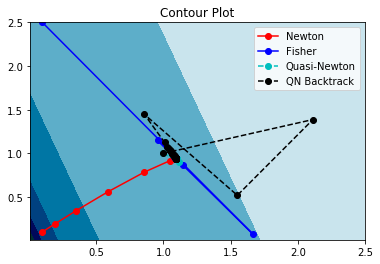

<Figure size 432x288 with 0 Axes>

In [9]:
# Creating a contour plot and plotting all the different methods used in
# the problem on the same plot
xs = np.linspace(0.01,2.5,100)
ys = np.linspace(0.01,2.5,100)
X,Y = np.meshgrid(xs,ys)
Zmesh = np.zeros((X.shape[0],Y.shape[0]))

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        a_0 = X[i,j] 
        a_1 = Y[i,j]
        a = np.array([a_0,a_1])
        Zmesh[i,j]=loglike(a,beta,N)[0]
        
plt.contourf(X,Y,Zmesh, cmap = 'ocean')
plt.plot(n_a,n_b,'ro-')
plt.plot(f_a,f_b,'bo-')
plt.plot(q_a,q_b,'co--')
plt.plot(back_a,back_b,'ko--')
plt.title('Contour Plot')
plt.legend(['Newton','Fisher', 'Quasi-Newton', 'QN Backtrack'])
plt.figure()
print()
